<a href="https://colab.research.google.com/github/GhosthoundMX30/Codigos-SNEDP/blob/main/MetodosRKSolEDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Métodos numéricos para la solución de (problema de valor inicial) PVI.

El problema de valor inicial toma la forma:

$$
u'(t) = f(u(t),t)\quad \text{para }t>t_0
$$

con la condición inicial

$$
u(t_{0}) = \eta.
$$

Con frecuencia se supone por simplicidad que $t_{0} = 0$.

### Métodos numéricos básicos.

Tenemos las condiciones iniciales

$$
U^{0} = \eta
$$

y queremos calcular las aproximaciones $U^{1}$, $U^{2}$, $\ldots$, de tal manera que

$$
U^{n}\approx u(t_{n}).
$$

In [1]:
# Modulos
import numpy as np
import sympy as sp
from scipy.optimize import fsolve

def f_conv(f_str,var = 'x',tipo = 'numpy'):
    '''Regresa una función lambda que representa una función matemática f(x).
    
    * Entrada
        * f_str (str): Cadena con la expresión de una función.
        * var (str): Varible independiente.
        * tipo (str): Compatibilidad. Ver documentación de lambdify en sympy.        
    * Salida
        * (function): Función de python.        
    * Dependencias
        * sympy (module).
    '''
    return sp.lambdify(sp.symbols(var),sp.sympify(f_str),tipo)
    
def forwardEuler(f,t0,U0,k = 0.1,M = 10):
    """Implementa el método de Euler para resolver la EDO de primer orden 
    u'(t) = f(u(t),t) con condición inicial u(t0) = U0. 
    
    * Entrada
        * f (function): Lado derecho de la ecuación. f = f(u(t),t).
        * t0 (float): Tiempo inicial.
        * U0 (float): Condición inicial. U0 = u(t0).
        * k (float): Tamaño de paso de tiempo.
        * M (int): Número de iteraciones
    * Salida
        * (ndarray): Valores para el tiempo t_i.
        * (ndarray): Aproximaciones de de la solución al tiempo t_i.
    * Dependencias
        * numpy (module).
    """
    U,t = [U0],[t0]
    for i in range(M):
        t.append(t[i] + k)
        U.append(U[i] + k*f(U[i],t[i]))
    return np.array(t,float),np.array(U,float)
    
def backwardEuler(f,t0,U0,k = 0.1,M = 10):
    """Implementa el método de Euler hacia atrás para resolver la EDO de primer
    orden u'(t) = f(u(t),t) con condición inicial u(t0) = U0. 
    
    * Entrada
        * f (function): Lado derecho de la ecuación. f = f(u(t),t).
        * t0 (float): Tiempo inicial.
        * U0 (float): Condición inicial. U0 = U(t0).
        * k (float): Tamaño de paso de tiempo.
        * M (int): Número de iteraciones
    * Salida
        * (ndarray): Valores para el tiempo t_i.
        * (ndarray): Aproximaciones de de la solución al tiempo t_i.
    * Dependencias
        * numpy (module),  fsolve(function - module:scipy.optimize).
    """
    U,t = [U0],[t0]
    for i in range(M):
        t.append(t[i] + k) 
        U.append(fsolve(lambda u : u - U[i] - k*f(u,t[i+1]),U0))
    return np.array(t,float),np.array(U,float)
    
def trapezoidal(f,t0,U0,k = 0.1,M = 10):
    """Implementa el método trapezoidal para resolver la EDO de primer orden 
    u'(t) = f(u(t),t) con condición inicial u(t0) = U0. 
    
    * Entrada
        * f (function): Lado derecho de la ecuación. f = f(u(t),t).
        * t0 (float): Tiempo inicial.
        * U0 (float): Condición inicial. U0 = U(t0).
        * k (float): Tamaño de paso de tiempo.
        * M (int): Número de iteraciones
    * Salida
        * (ndarray): Valores para el tiempo t_i.
        * (ndarray): Aproximaciones de de la solución al tiempo t_i.
    * Dependencias
        * numpy (module), fsolve(function - module:scipy.optimize).
    """
    U,t = [U0],[t0]
    for i in range(M):
        t.append(t[i] + k) 
        U.append(fsolve(lambda u : u - U[i] - k/2.*(f(U[i],t[i]) + f(u,t[i+1])),
                        U0)[0])
    return np.array(t,float),np.array(U,float)

def midpoint(f,t0,U0,k = 0.1,M = 10):
    """Implementa el método del punto medio para resolver la EDO de primer orden 
    u'(t) = f(u(t),t) con condición inicial u(t0) = U0. 
    
    * Entrada
        * f (function): Lado derecho de la ecuación. f = f(u(t),t).
        * t0 (float): Tiempo inicial.
        * U0 (float): Condición inicial. U0 = u(t0).
        * k (float): Tamaño de paso de tiempo.
        * M (int): Número de iteraciones
    * Salida
        * (ndarray): Valores para el tiempo t_i.
        * (ndarray): Aproximaciones de de la solución al tiempo t_i.
    * Dependencias
        * numpy (module), trapezoidal(function).
    """
    t0,U0,k = [float(x) for x in [t0,U0,k]]
    U,t = [U0,trapezoidal(f,t0,U0,k,1)[-1][-1]],[t0,t0+k]
    for i in range(1,M):
        t.append(t[i] + k)
        U.append(U[i-1] + 2.*k*f(U[i],t[i]))
    return np.array(t,float),np.array(U,float)

### Métodos de Runge-Kutta

Consideramos el método de **Runge-Kutta de cuatro etapas de cuarto orden**,

$$
\begin{align*}
		Y_{1} & = U^n\\
		Y_{2} &= U^{n} + \frac{1}{2}kf\left(Y_{1},t_{n}\right),\\
		Y_{3} &= U^{n} + \frac{1}{2}kf\left(Y_{2},t_{n} + \frac{k}{2}\right),\\
		Y_{4} &= U^{n} + kf\left(Y_{3},t_{n}+\frac{k}{2}\right),\\
		U^{n+1} &= U^{n} + \frac{k}{6}\left[f(Y_{1},t_{n}) + 2f\left(Y_{2},t_{n}+\frac{k}{2}\right)\right.\\	
		        & \quad\qquad \left.+2f\left(Y_{3},t_{n}+\frac{k}{2}\right) + f(Y_{4},t_{n} + k)\right]
\end{align*}
$$

In [2]:
def RK4(f,t0,U0,k = 0.1,M = 10):
    """Implementa el método de Runge-Kutta de cuarto orden para resolver la 
    EDO de primer orden u'(t) = f(t,x(t)) con condición inicial u(t0) = U0. 
    
    * Entrada
        * f (function): Lado derecho de la ecuación. f = f(t,x(t)).
        * t0 (float): Tiempo inicial.
        * U0 (float): Condición inicial. U0 = u(t0).
        * k (float): Tamaño de paso de tiempo.
        * M (float): Número de iteraciones
    * Salida
        * (ndarray): Valores para el tiempo t_i.
        * (ndarray): Aproximaciones de de la solución al tiempo t_i.
    * Dependencias
        * numpy (module).
    """
    U,t = [U0],[t0]
    for n in range(M):
        t.append(t[n] + k)
        Y1 = U[n]
        Y2 = U[n] + k/2.*f(Y1,t[n])
        Y3 = U[n] + k/2.*f(Y2,t[n] + k/2.)
        Y4 = U[n] + k*f(Y3,t[n] + k/2.)        
        U.append(U[n] + k/6.*(f(Y1,t[n]) + 2.*f(Y2,t[n] + k/2.) \
                              + 2.*f(Y3,t[n] + k/2.) + f(Y4,t[n+1])))
    return np.array(t,float),np.array(U,float)

Consideramos el método de **Runge-Kutta de segundo orden**,
$$
\begin{align*}
		Y_{1} & = U^n\nonumber\\
		Y_{2} &= U^{n} + \frac{k}{2}f\left(Y_{1},t_{n}\right),\nonumber\\
		U^{n+1} &= U^{n} + kf\left(Y_{2},t_{n}+ \frac{k}{2}\right) \tag{Runge-Kutta ord 2}\\
		\hat{U}^{n+1} &= U^{n} + kf\left(Y_{1},t_{n}\right)\tag{Euler hacia adelante}
\end{align*}
$$

El método de Runge-Kutta (RK2) utilizado en este esquema es de segundo orden ($O(k^{2})$), mientras que el método de Euler es de primer orden $O(k)$. EL error local de truncamiento para RK2 se puede escribir como

$$
\begin{align*}
  \tau^{n+1}_{\mathrm{RK2}} &= \dfrac{u(t_{n+1})- u(t_{n})}{k} - f\left(Y_{2},t_{n}+ \frac{k}{2}\right)\\
  &\approx \dfrac{u(t_{n+1})- (U^{n} + kf\left(Y_{2},t_{n}+ \frac{k}{2}\right)}{k}\\ 
  &= \dfrac{u(t_{n+1})- U^{n+1}}{k}
\end{align*}
$$

De forma ánaloga

$$
\tau^{n+1}_{\mathrm{Euler}} \approx \dfrac{u(t_{n+1})- \hat{U}^{n+1}}{k}
$$

En consecuencia,

$$
\tau^{n+1}_{\mathrm{Euler}} \approx \dfrac{u(t_{n+1})- \hat{U}^{n+1}}{k} = \tau^{n+1}_{\mathrm{RK2}} + \frac{U^{n+1} - \hat{U}^{n+1}}{k}
$$

Dado que $\tau^{n+1}_{\mathrm{RK2}}$ es $O(k^2)$ la parte significativa del error debe provenir del segundo término. Por lo tanto una estimación del método local de truncamiento del método de Euler
$$
  \tau^{n+1}_{\mathrm{Euler}} \approx \frac{U^{n+1} - \hat{U}^{n+1}}{k}
$$

Para mantener el error local dentro de una cota específicada $\varepsilon$ es necesario variar el tamaño de paso $k$. Suponemos que existe un número $\beta$ independiente de $k$ talque

$$
  \tau^{n+1}(k) \approx \beta k.
$$

De esta nanera podemos estimar el error local de truncamiento al aplicar el método de Euleer con un nuevo tamaño de paso $qk$, usando las aproximaciones originales $U^{n+1}$ y $\hat{U}^{n+1}$

$$
\tau^{n+1}(qk) \approx \beta qk \approx q\tau^{n+1}(k) \approx \dfrac{q}{k} (U^{n+1}- \hat{U}^{n+1}).
$$

Para establecer la cota de $\tau^{n+1}(qk)$ por $\varepsilon$, escogemos $q$ tal que 

$$
  \dfrac{q}{k} |U^{n+1}- \hat{U}^{n+1}| \approx |\tau^{n+1}(qk)| \leq \varepsilon
$$
es decir,
$$
  q \leq\dfrac{\varepsilon k}{|U^{n+1}- \hat{U}^{n+1}|}
$$

In [3]:
def RK2Embd(f,t0,U0,k = 0.1,M = 10,FixedStep = True,tol = 1e-3,kmin = 0.05,kmax=0.25):
    """Implementa el método de Runge-Kutta de segundo orden para resolver la 
    EDO de primer orden u'(t) = f(t,x(t)) con condición inicial u(t0) = U0. 
    
    * Entrada
        * f (function): Lado derecho de la ecuación. f = f(t,x(t)).
        * t0 (float): Tiempo inicial.
        * U0 (float): Condición inicial. U0 = u(t0).
        * k (float): Tamaño de paso de tiempo.
        * M (float): Número de iteraciones
    * Salida
        * (ndarray): Valores para el tiempo t_i.
        * (ndarray): Aproximaciones de de la solución al tiempo t_i.
    * Dependencias
        * numpy (module).
    """
    U,t = [U0],[t0]
    for n in range(M):
      t.append(t[n] + k)
      Y1 = U[n]
      fY1 = f(Y1,t[n])
      Y2 = U[n] + k/2.*fY1
      U.append(U[n] + k*f(Y2,t[n] + k/2.))
      if not FixedStep:
        Uhat = U[n] + k*fY1
        #k = min(max(k*tol/(2.*np.fabs(U[n+1]-Uhat)),kmin),kmax)
        k = k*tol/(2.*np.fabs(U[n+1]-Uhat))
    return np.array(t,float),np.array(U,float)

#### Ejemplo

Consideramos el siguiente PVI

$$
	u'(t) = \dfrac{2}{t}u(t) + t^{2}e^{t}
$$

con la condición inicial

$$
  u(1) = 0
$$

Cuya solución exacta está dada por:

$$
u(t) = t^{2}(e^{t} - e).
$$

Analizamos el comportamiento de los diferentes métodos para resolver este problema.

╒═════╤═══════╤═════════════════╤══════════════════╤══════════════════╤═══════════════════╤═══════════════════╕
│     │       │   <Sol. exacta> │    <Trapezoidal> │    <Punto medio> │   <Runge-Kutta 2> │   <Runge-Kutta 4> │
│   i │   t_i │          u(t_i) │   |u(t_i) - U^i| │   |u(t_i) - U^i| │    |u(t_i) - U^i| │    |u(t_i) - U^i| │
╞═════╪═══════╪═════════════════╪══════════════════╪══════════════════╪═══════════════════╪═══════════════════╡
│   0 │  1    │        0        │     0.000000e+00 │     0.000000e+00 │      0.000000e+00 │      0.000000e+00 │
├─────┼───────┼─────────────────┼──────────────────┼──────────────────┼───────────────────┼───────────────────┤
│   1 │  1.05 │        0.153655 │     4.024656e-04 │     4.024656e-04 │      6.150777e-04 │      3.249678e-07 │
├─────┼───────┼─────────────────┼──────────────────┼──────────────────┼───────────────────┼───────────────────┤
│   2 │  1.1  │        0.34592  │     8.768000e-04 │     1.519630e-03 │      1.340621e-03 │      6.77894

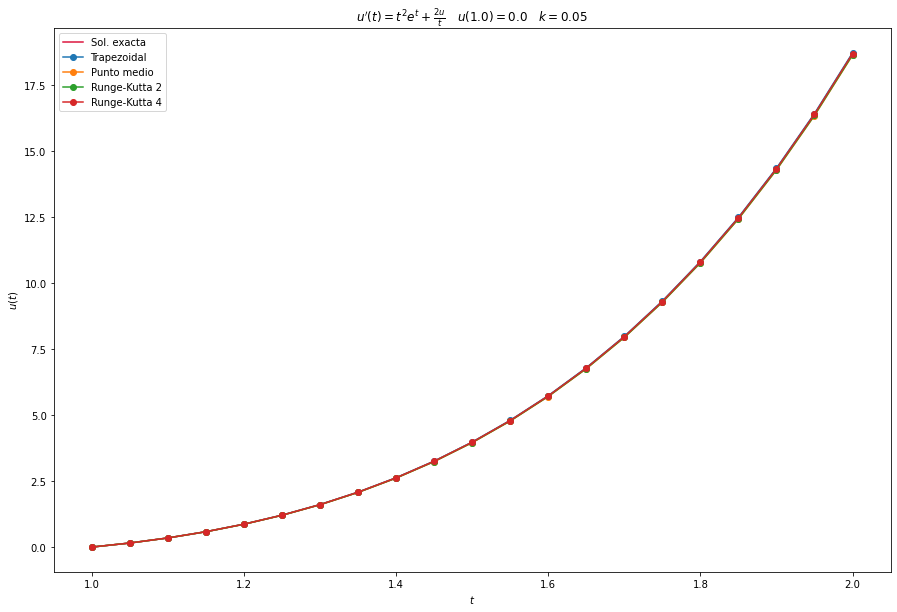

In [4]:
from tabulate import tabulate
import matplotlib.pyplot as plt

#Datos
f_str = '2/t*u + t**2*exp(t)'
f = f_conv(f_str,('u t'))
u_exct = f_conv('t**2*(exp(t) - exp(1))',('t'))
t0 = 1.
U0 = 0.
k = 0.05
M = 20
fmt = 'fancy_grid'

metodos = {'Trapezoidal':trapezoidal,
           'Punto medio':midpoint,
           'Runge-Kutta 2':RK2Embd,
           'Runge-Kutta 4':RK4}

#Resultados
T = np.empty((M+1,len(metodos) + 3),float)
T[:,0] = np.arange(M+1)
T[:,1] = np.arange(t0,t0 + (M+1)*k,k)
T[:,2] = u_exct(T[:,1])

#Gráfica de la solución exacta
fig = plt.figure(figsize=(15,10))
plt.plot(T[:,1],T[:,2],label = 'Sol. exacta',color = 'crimson')

hdr = ['\ni','\nt_i','<Sol. exacta>\nu(t_i)']
fmtTabla = ['g','g','.6g']

#Calculamos las soluciones y creamos sus gráficas
i = 3
for met in metodos.keys():
  sol = metodos[met](f,t0,U0,k,M)[1]
  T[:,i] = np.fabs(T[:,2] - sol)
  hdr.append(f'<{met}>\n|u(t_i) - U^i|')
  fmtTabla.append('.6e')
  plt.plot(T[:,1],sol,'-o',label = met)
  i += 1  

# Imprimimos la tabla de resultados con los errores
print(tabulate(T, headers=hdr,tablefmt=fmt, floatfmt = fmtTabla))

#Grafica de comparación
ax = plt.gca()
ax.set_xlabel('$t$')
ax.set_ylabel('$u(t)$')
s = sp.latex(sp.sympify(f_str))
ax.set_title("$u'(t) = " + s + f"\quad u({t0}) = {U0}\quad k={k}$")
ax.legend()
plt.show()

╒═════╤═════════╤═════════════════╤═══════════════════╕
│     │         │   <Sol. exacta> │   <Runge-Kutta 2> │
│   i │     t_i │          u(t_i) │            u(t_i) │
╞═════╪═════════╪═════════════════╪═══════════════════╡
│   0 │ 1       │        0        │      0.000000e+00 │
├─────┼─────────┼─────────────────┼───────────────────┤
│   1 │ 1.05    │        0.153655 │      6.150777e-04 │
├─────┼─────────┼─────────────────┼───────────────────┤
│   2 │ 1.05015 │        0.154157 │      6.152488e-04 │
├─────┼─────────┼─────────────────┼───────────────────┤
│   3 │ 1.09454 │        0.322895 │      1.133755e-03 │
├─────┼─────────┼─────────────────┼───────────────────┤
│   4 │ 1.09468 │        0.323499 │      1.134056e-03 │
├─────┼─────────┼─────────────────┼───────────────────┤
│   5 │ 1.1348  │        0.505152 │      1.586027e-03 │
├─────┼─────────┼─────────────────┼───────────────────┤
│   6 │ 1.13494 │        0.505857 │      1.586430e-03 │
├─────┼─────────┼─────────────────┼─────────────

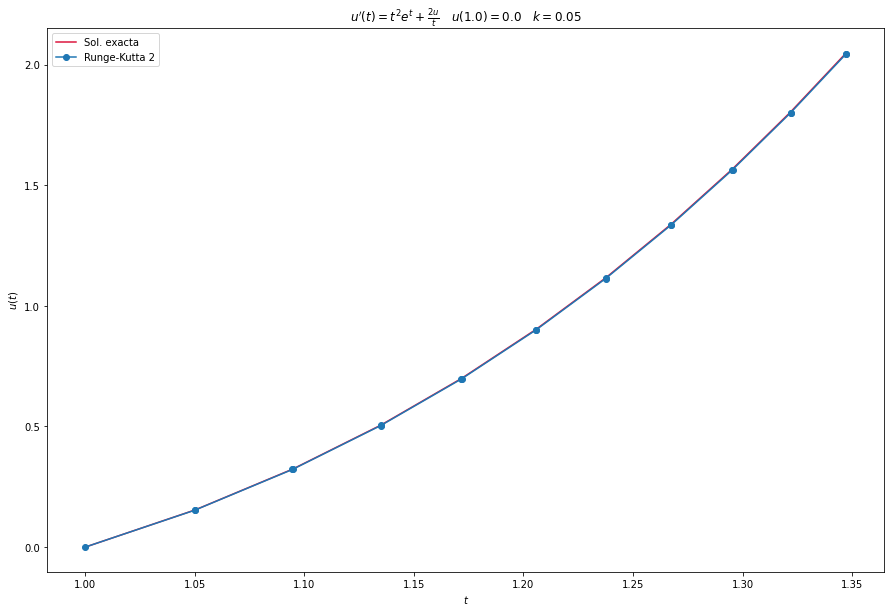

In [5]:
#Datos
t0 = 1.
U0 = 0.
k = 0.05
M = 20
fmt = 'fancy_grid'

t,U = RK2Embd(f,t0,U0,k,M,FixedStep=False,tol=1e-4)

#Resultados
T = np.empty((M+1,4),float)
T[:,0] = np.arange(M+1)
T[:,1] = t
T[:,2] = u_exct(t)
T[:,3] = np.fabs(T[:,2]-U)

#Gráfica de la solución exacta y aproximada
fig = plt.figure(figsize=(15,10))
plt.plot(t,T[:,2],label = 'Sol. exacta',color = 'crimson')
plt.plot(t,U,'-o',label = 'Runge-Kutta 2')

hdr = ['\ni','\nt_i','<Sol. exacta>\nu(t_i)','<Runge-Kutta 2>\nu(t_i)']
fmtTabla = ['g','g','.6g','.6e']

# Imprimimos la tabla de resultados con los errores
print(tabulate(T, headers=hdr,tablefmt=fmt, floatfmt = fmtTabla))

#Grafica de comparación
ax = plt.gca()
ax.set_xlabel('$t$')
ax.set_ylabel('$u(t)$')
s = sp.latex(sp.sympify(f_str))
ax.set_title("$u'(t) = " + s + f"\quad u({t0}) = {U0}\quad k={k}$")
ax.legend()
plt.show()

### Ejemplo de solución de una ecuación de tercer orden

Consideramos el PVI

$$
\left\{\begin{array}{l}
	x''' - \sin(x'') + e^tx' + 2t\cos(x) = 25 \\
	\\
	x(0) = 5,\quad x'(0) = 3,\quad x''(0) = 7
\end{array}\right.
$$

Para transformarlo en un sistema de ecuaciones de primer orden, definimos

$$
\begin{align*}
	y &= x' & &\Rightarrow & y' &= x''\\
	z &= y' & &\Rightarrow & z' &= y'' = x'''\\
\end{align*}
$$

Sustituyendo, obtenemos el sistema,

$$
\left\{\begin{array}{ll}
	x' &= y\\
	y' &= z\\
	z' &= 25 + \sin(z) - e^ty - 2t\cos(x)
\end{array}\right.
$$

con condición inicial, $x(0) = 5$, $y(0) = 3$ y $z(0) = 7$.

In [6]:
def fvect_conv(funs,var,tipo = "numpy"):
    '''Regresa una función lambda que representa una función vectorial F(x,t) 
    con x un vector y t escalar.
    
    * Entrada
        * funs (array str): Arreglo de cadenas con las expresiones de las 
                            funciones escalares.
        * var (str): Varible independiente.
        * tipo (str): Compatibilidad. Ver documentación de lambdify en sympy.        
    * Salida
        * (function): Función de python que devuelve 1D ndarray como 
                      representación del vector resultante de una evaluación.
    * Dependencias
        * numpy (module), f_conv (function).
    '''
    F = [f_conv(f,var,tipo) for f in funs]
    return lambda x,t: np.array([f(*x,t) for f in F],float)

╒═════╤═══════╤════════════╤════════════╤════════════╕
│     │       │      <RK4> │      <RK4> │      <RK4> │
│   k │   t_k │        x_k │        y_k │        z_k │
╞═════╪═══════╪════════════╪════════════╪════════════╡
│   0 │   0   │  5         │  3         │  7         │
├─────┼───────┼────────────┼────────────┼────────────┤
│   1 │   0.1 │  5.3387545 │  3.812323  │  9.2164978 │
├─────┼───────┼────────────┼────────────┼────────────┤
│   2 │   0.2 │  5.7693986 │  4.8323464 │ 11.132047  │
├─────┼───────┼────────────┼────────────┼────────────┤
│   3 │   0.3 │  6.3111966 │  6.031931  │ 12.839015  │
├─────┼───────┼────────────┼────────────┼────────────┤
│   4 │   0.4 │  6.9812752 │  7.3957885 │ 14.401347  │
├─────┼───────┼────────────┼────────────┼────────────┤
│   5 │   0.5 │  7.795087  │  8.9011879 │ 15.640228  │
├─────┼───────┼────────────┼────────────┼────────────┤
│   6 │   0.6 │  8.7649511 │ 10.509911  │ 16.46394   │
├─────┼───────┼────────────┼────────────┼────────────┤
│   7 │   

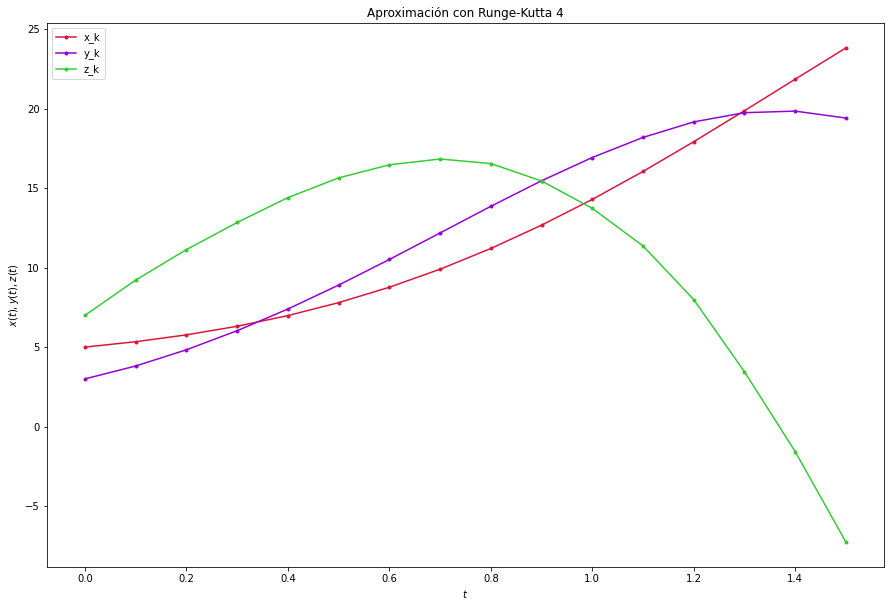

In [7]:
sistema_str = ['y','z','25 + sin(z) - exp(t)*y - 2*t*cos(x)']
F = fvect_conv(sistema_str,('x y z t'))
t0 = 0.
tf = 1.5
U0 = np.array([5,3,7],float)
h = 0.1
M = int((tf-t0)/h)
fmt = 'fancy_grid'
metodo = RK4

#Calculamos las soluciones
t,U = metodo(F,t0,U0,h,M)

#Resultados
T = np.empty((M+1,5),float)
T[:,0] = range(M+1)
T[:,1] = t
T[:,2] = U[:,0]
T[:,3] = U[:,1]
T[:,4] = U[:,2]

print(tabulate(T, headers=['\nk','\nt_k','<RK4>\nx_k','<RK4>\ny_k','<RK4>\nz_k'],
               tablefmt=fmt, floatfmt = ('g','g','.8g','.8g','.8g')))

#Grafica
fig = plt.figure(figsize=(15,10))
plt.plot(t,U[:,0],'.-',label = 'x_k',color = 'crimson')
plt.plot(t,U[:,1],'.-',label = 'y_k',color = 'darkviolet')
plt.plot(t,U[:,2],'.-',label = 'z_k',color = 'limegreen')
ax = plt.gca()
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t), y(t), z(t)$')
ax.set_title("Aproximación con Runge-Kutta 4")
ax.legend()
plt.show()